In [4]:
# import des modules nécessaires
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from distinctipy import distinctipy
from matplotlib.font_manager import FontProperties
from matplotlib import rc
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ipywidgets as widgets
from IPython.display import clear_output, display
from scipy.stats import chi2_contingency as chi2_contingency
import statsmodels.formula.api as statsapi
import statsmodels as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import xlrd as xlrd
from matplotlib import font_manager # for mac users
import platform
import os

# Modifier les paramètres d'affichage de la sortie des commandes dans Jupyter
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 100)

# Pour lister les polices présentes
#fpaths = matplotlib.font_manager.findSystemFonts()
#for i in fpaths:
#    f = matplotlib.font_manager.get_font(i)
#    print(f.family_name)
# import de la police Garamond

system = platform.system()

if system == 'Darwin':  # macOS
  font_path = '/Library/Fonts/GaramondPremrPro.otf'
elif system == 'Windows':
  font_path = 'C:/Windows/Fonts/GARA.TTF'
else:  #  unix
  font_path = 'GARA.TTF'
print(font_path)

garamond_font = FontProperties(fname="/Library/Fonts/GaramondPremrPro.otf",size=14)
#    timesnewroman_font = FontProperties(fname="C:/Windows/Fonts/TIMES.TTF",size=14)

font_manager.findSystemFonts(fontpaths=font_path, fontext="ttf")
font_manager.findfont("Garamond Premier Pro") 

/Library/Fonts/GaramondPremrPro.otf


'/Library/Fonts/GaramondPremrPro.otf'

In [5]:
# Chargement des données IRIS
df_iris = pd.read_table("input/dimreduc/iris.data",sep=",")

# Ajout titre colonnes
df_iris.columns=["sepal_length_cm","sepal_width_cm","petal_length_cm","petal_width_cm","iris_class"]

# Verif données
print(df_iris.head(5))
print("Shape des données IRIS: ", df_iris.shape)

   sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm   iris_class
0              4.9             3.0              1.4             0.2  Iris-setosa
1              4.7             3.2              1.3             0.2  Iris-setosa
2              4.6             3.1              1.5             0.2  Iris-setosa
3              5.0             3.6              1.4             0.2  Iris-setosa
4              5.4             3.9              1.7             0.4  Iris-setosa
Shape des données IRIS:  (149, 5)


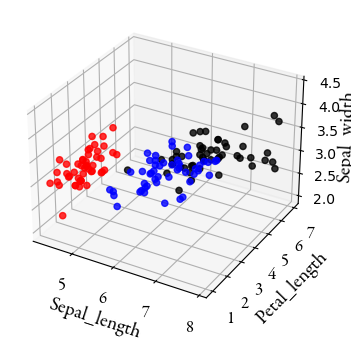

In [6]:
# Affichage des données IRIS en 3D sur les axes : Sepal_length, Petal_length, Sepal_width

fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(projection='3d')
x=df_iris["sepal_length_cm"]
y=df_iris["petal_length_cm"]
z=df_iris["sepal_width_cm"]
colors={"Iris-setosa":"red","Iris-versicolor":"blue","Iris-virginica":"black"}
sctt=ax.scatter3D(x,y,z,alpha=0.8, c=df_iris["iris_class"].map(colors))
plt.xticks(font=garamond_font,fontsize=12)
plt.yticks(font=garamond_font,fontsize=12)
plt.xlabel("Sepal_length", font=garamond_font,fontsize=14)
plt.ylabel("Petal_length", font=garamond_font,fontsize=14)
ax.set_zlabel("Sepal_width", font=garamond_font,fontsize=14)
ax.zaxis.labelpad=-0.7
plt.show()

/var/folders/8g/9w5gh8y54xd9jss52_tlythr0000gn/T/ipykernel_1821/1371600169.py:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  temp = df_iris.sub(df_iris.mean()) # Soustraire la moyenne de chaque colonne à chaque valeur : centrer les valeurs


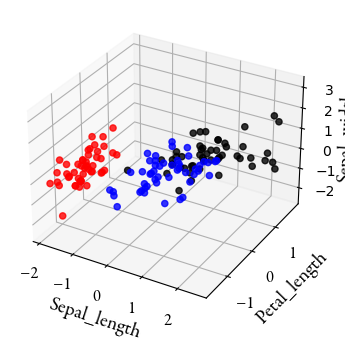

In [7]:
# Centrer et reduire les données

# Première méthode avec scale
from sklearn.preprocessing import scale
#df_iris_cr = scale(df_iris)

# Seconde méthode pour obtenir directement un dataframe
temp = df_iris.sub(df_iris.mean()) # Soustraire la moyenne de chaque colonne à chaque valeur : centrer les valeurs
df_iris_cr= temp.div(temp.std()) # Divisé les valeurs de la dataframe par l'écart-type de chaque colonne
df_iris_cr["iris_class"]=df_iris["iris_class"]
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(projection='3d')
x=df_iris_cr["sepal_length_cm"]
y=df_iris_cr["petal_length_cm"]
z=df_iris_cr["sepal_width_cm"]
colors={"Iris-setosa":"red","Iris-versicolor":"blue","Iris-virginica":"black"}
sctt=ax.scatter3D(x,y,z,alpha=0.8, c=df_iris_cr["iris_class"].map(colors))
plt.xticks(font=garamond_font,fontsize=12)
plt.yticks(font=garamond_font,fontsize=12)
plt.xlabel("Sepal_length", font=garamond_font,fontsize=14)
plt.ylabel("Petal_length", font=garamond_font,fontsize=14)
ax.set_zlabel("Sepal_width", font=garamond_font,fontsize=14)
ax.zaxis.labelpad=-0.7
plt.show()

[0.72620033 0.23147407 0.03711516 0.00521044]
[[ 0.52308496 -0.25956935  0.58184289  0.56609604]
 [ 0.36956962  0.92681168  0.01912775  0.06381646]
 [-0.72154279  0.2411952   0.13962963  0.63380158]
 [-0.26301409  0.12437342  0.80099722 -0.52321917]]


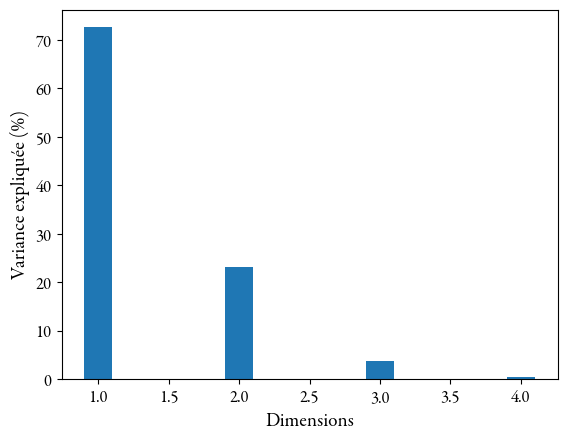

In [141]:
# ACP des données IRIS. Affichage des variances expliquées

from sklearn.decomposition import PCA
df_iris_cr_sans_irisclasse = df_iris_cr[["sepal_length_cm","sepal_width_cm","petal_length_cm","petal_width_cm"]]
pca=PCA()
pca = pca.fit(df_iris_cr_sans_irisclasse)
print(pca.explained_variance_ratio_) # Les 2 premiers composantes principales amènent 95% de la variance expliquée

# Affichage des variances expliquées avec intitulés, et chosir les 2 plus importants
fig,ax = plt.subplots()
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_ratio_)+1),
    100*pca.explained_variance_ratio_,
    width=0.2
    )
plt.xlabel("Dimensions",  font=garamond_font, fontsize=14)
plt.ylabel("Variance expliquée (%)", font=garamond_font, fontsize=14)
plt.xticks(font=garamond_font,fontsize=12)
plt.yticks(font=garamond_font,fontsize=12)
plt.show()


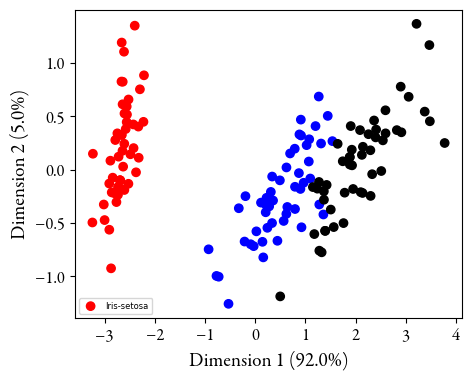

In [156]:
# Deux composants pour expliquer 95% de la variance
pca=PCA(n_components=2)
components = pca.fit_transform(df_iris[["sepal_length_cm","sepal_width_cm","petal_length_cm","petal_width_cm"]])
df = pd.DataFrame(data=components)

# Affichage des données avec 2 composantes principales, données brutes
labels = ["Iris-setosa","Iris-versicolor","Iris-virginica"]
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot()
colors={"Iris-setosa":"red","Iris-versicolor":"blue","Iris-virginica":"black"}
sctt=ax.scatter(x=df[0],y=df[1], c=df_iris["iris_class"].map(colors))
plt.xticks(font=garamond_font,fontsize=12)
plt.yticks(font=garamond_font,fontsize=12)
plt.xlabel("Dimension 1 (" + str(round(pca.explained_variance_ratio_[0],2)*100) + "%)", font=garamond_font,fontsize=14)
plt.ylabel("Dimension 2 (" + str(round(pca.explained_variance_ratio_[1],2)*100) + "%)", font=garamond_font,fontsize=14)
plt.legend(labels=["Iris-setosa","Iris-versicolor","Iris-virginica"], loc='best', prop={'size':6}, ncol=2)
plt.show()

[[ 0.52308496 -0.25956935  0.58184289  0.56609604]
 [ 0.36956962  0.92681168  0.01912775  0.06381646]]


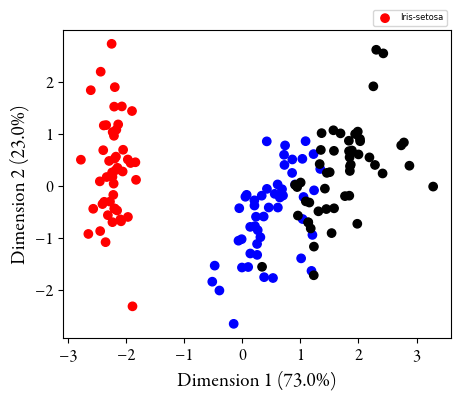

In [157]:
# Affichage des données avec 2 composantes principales, données centrées réduites

pca=PCA(n_components=2)
components = pca.fit_transform(df_iris_cr[["sepal_length_cm","sepal_width_cm","petal_length_cm","petal_width_cm"]])
df = pd.DataFrame(data=components)
df["iris_class"]=df_iris_cr["iris_class"]
print(pca.components_)
# Affichage des données avec 2 composantes principales
labels = ["Iris-setosa","Iris-versicolor","Iris-virginica"]
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot()
colors={"Iris-setosa":"red","Iris-versicolor":"blue","Iris-virginica":"black"}
sctt=ax.scatter(x=df[0],y=df[1], c=df_iris_cr["iris_class"].map(colors))
plt.xticks(font=garamond_font,fontsize=12)
plt.yticks(font=garamond_font,fontsize=12)
plt.xlabel("Dimension 1 (" + str(round(pca.explained_variance_ratio_[0],2)*100) + "%)", font=garamond_font,fontsize=14)
plt.ylabel("Dimension 2 (" + str(round(pca.explained_variance_ratio_[1],2)*100) + "%)", font=garamond_font,fontsize=14)
plt.legend(labels=labels, loc='lower right', prop={'size':6}, bbox_to_anchor=(1, 1))
plt.show()

In [11]:
# import libraries. Coefficient de Pearson pour les paires deux à deux
from scipy.stats import pearsonr
import itertools

# suppression de la colonne iris class
df_iris_cr2 = df_iris_cr[["sepal_length_cm","sepal_width_cm","petal_length_cm","petal_width_cm"]]

# Corrélation 2 à 2 pour la matrice de corrélation du jeu de données iris
correlations = {}
columns = df_iris_cr2.columns.tolist()

for col_a, col_b in itertools.combinations(columns, 2):
    correlations[col_a + '__' + col_b] = pearsonr(df_iris_cr2.loc[:, col_a], df_iris_cr2.loc[:, col_b])

result = pd.DataFrame.from_dict(correlations, orient='index')
result.columns = ['PCC', 'p-value']

print(result.sort_index())

                                       PCC       p-value
petal_length_cm__petal_width_cm   0.962314  5.028786e-85
sepal_length_cm__petal_length_cm  0.871283  2.735066e-47
sepal_length_cm__petal_width_cm   0.816971  5.770419e-37
sepal_length_cm__sepal_width_cm  -0.103784  2.078201e-01
sepal_width_cm__petal_length_cm  -0.415218  1.399027e-07
sepal_width_cm__petal_width_cm   -0.350733  1.158174e-05


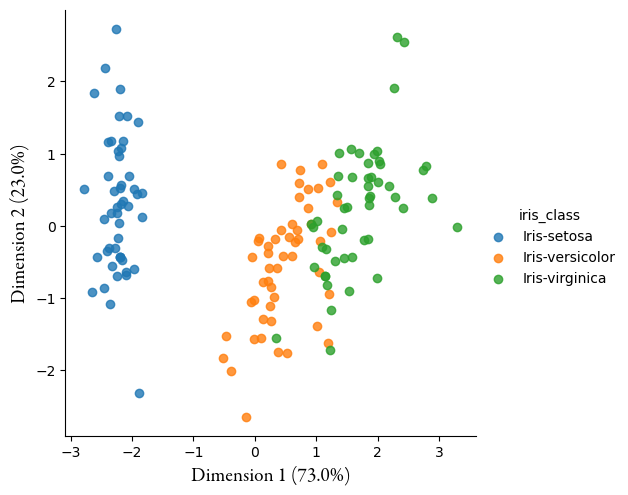

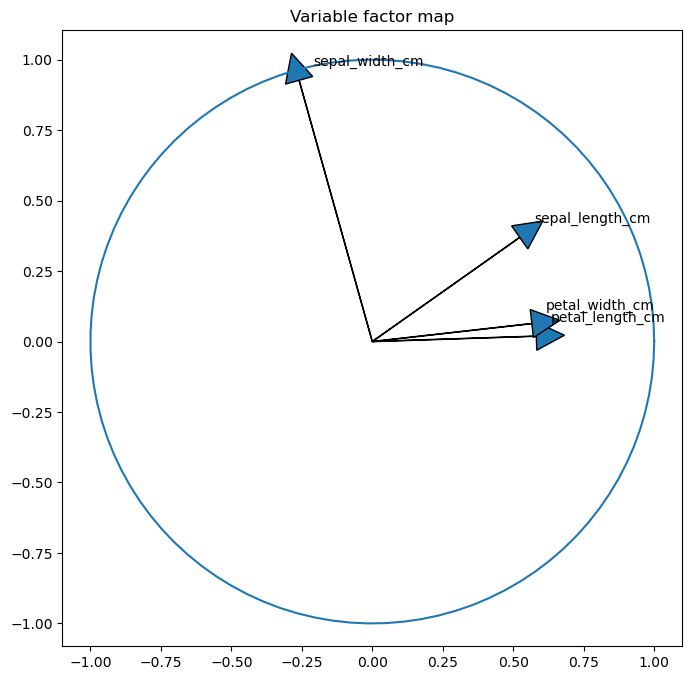

[ 0.52308496 -0.25956935  0.58184289  0.56609604]


In [164]:
n_components = 4

# Do the PCA
pca = PCA(n_components=n_components)
reduced = pca.fit_transform(df_iris_cr[["sepal_length_cm","sepal_width_cm","petal_length_cm","petal_width_cm"]])

# Append the principle components for each entry to the dataframe
for i in range(0, n_components):
    df_iris_cr['PC' + str(i + 1)] = reduced[:, i]

# Show the points in terms of the first two PCs
g = sns.lmplot(data=df_iris_cr,
               x='PC1',
               y='PC2',
               hue='iris_class',
               fit_reg=False,
               scatter=True)
plt.xlabel("Dimension 1 (" + str(round(pca.explained_variance_ratio_[0],2)*100) + "%)", font=garamond_font,fontsize=14)
plt.ylabel("Dimension 2 (" + str(round(pca.explained_variance_ratio_[1],2)*100) + "%)", font=garamond_font,fontsize=14)
plt.show()

# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(8, 8))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.1,
             head_length=0.1)

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             df_iris_cr2.columns.values[i])
an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Variable factor map')
plt.show()
print(pca.components_[0])

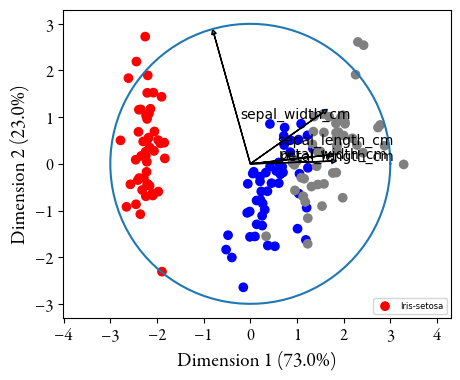

In [154]:
# Individus et Cercle de corrélation
#from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple
from matplotlib import legend_handler
n_components = 4

# Do the PCA
pca = PCA(n_components=n_components)
reduced = pca.fit_transform(df_iris_cr[["sepal_length_cm","sepal_width_cm","petal_length_cm","petal_width_cm"]])

# Affichage des données avec 2 composantes principales
labels = ["Iris-setosa","Iris-versicolor","Iris-virginica"]
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot()
colors={"Iris-setosa":"red","Iris-versicolor":"blue","Iris-virginica":"grey"}
sctt=ax.scatter(x=df[0],y=df[1], c=df_iris_cr["iris_class"].map(colors))
plt.xticks(font=garamond_font,fontsize=12)
plt.yticks(font=garamond_font,fontsize=12)

plt.xlabel("Dimension 1 (" + str(round(pca.explained_variance_ratio_[0],2)*100) + "%)", font=garamond_font,fontsize=14)
plt.ylabel("Dimension 2 (" + str(round(pca.explained_variance_ratio_[1],2)*100) + "%)", font=garamond_font,fontsize=14)
ax.legend(labels=labels, loc='lower right', prop={'size':6})
# Plot a variable factor map for the first two dimensions.
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             3*pca.components_[0, i],  #0 for PC1
             3*pca.components_[1, i],  #1 for PC2
             head_width=0.1,
             head_length=0.1)

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             df_iris_cr2.columns.values[i])
an = np.linspace(0, 2 * np.pi, 100)
ax = plt.plot(3*np.cos(an), 3*np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show()

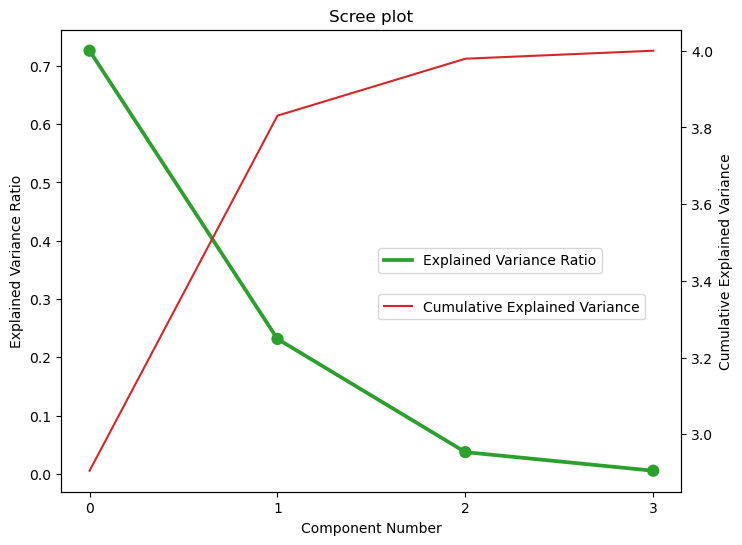

In [179]:
# Test des batons brisés

# Do a scree plot (ax1)
color = 'tab:green'
label=["Explained Variance Ratio"]
ind = np.arange(0, n_components)
(fig, ax1) = plt.subplots(figsize=(8, 6))
ax1 = sns.pointplot(x=ind, y=pca.explained_variance_ratio_,color=color)
ax1.set_xlabel('Component Number')
ax1.set_title('Scree plot')
ax1.set_ylabel("Explained Variance Ratio")
ax1.legend(label,loc="center left", bbox_to_anchor=(0.5,0.5))

# Ligne cumulée (ax2)
ax2=ax1.twinx()
array_ev = pca.explained_variance_.cumsum()
sry = pd.Series(array_ev)
color = 'tab:red'
ax2 = sns.lineplot(sry,ax=ax2,color=color)
ax2.set_ylabel('Cumulative Explained Variance')
label=["Cumulative Explained Variance"]
ax2.set_label(labels)

ax2.legend(label,loc="center left",bbox_to_anchor=(0.5,0.4))

plt.show()

In [133]:
# importing the modules
from tabulate import tabulate

# Eigen values and vectors
print(pca.components_)
print("Eigen values", len(pca.explained_variance_))
print("Cumulative explained variance", len(array_ev))
print("% Variance", len(100*pca.explained_variance_ratio_))

# Création du DataFrame
dict = {'Eigen values':pca.explained_variance_,
        '% Variance':100*pca.explained_variance_ratio_,
        'Cumulative explained variance':array_ev}
df_tableau = pd.DataFrame(dict)

# Affichage table style
print(tabulate(df_tableau, headers = 'keys', tablefmt = 'simple'))

# Coef de 25 entre Eigen values et % Variance

[[ 0.52308496 -0.25956935  0.58184289  0.56609604]
 [ 0.36956962  0.92681168  0.01912775  0.06381646]
 [-0.72154279  0.2411952   0.13962963  0.63380158]
 [-0.26301409  0.12437342  0.80099722 -0.52321917]]
Eigen values 4
Cumulative explained variance 4
% Variance 4
      Eigen values    % Variance    Cumulative explained variance
--  --------------  ------------  -------------------------------
 0       2.9048        72.62                              2.9048
 1       0.925896      23.1474                            3.8307
 2       0.148461       3.71152                           3.97916
 3       0.0208418      0.521044                          4


In [201]:
# Loading factors

ary = pca.components_ * np.sqrt(pca.explained_variance_)
df=pd.DataFrame()
df["PC"]=["PC1","PC2","PC3","PC4"]
for i in range(4):
    df["Var" + str(i)] = ary[:,i]
df.rename(columns={"Var0":"sepal_length_cm","Var1":"sepal_width_cm","Var2":"petal_length_cm","Var3":"petal_width_cm"},inplace=True)
print(df.set_index(["PC"]))
#print("SPACE")
#print(df.iloc[0,:]) # Renommage 1ere ligne

     sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm
PC                                                                   
PC1         0.891519       -0.249767         0.224187        0.081725
PC2         0.629875        0.891811         0.007370        0.009213
PC3        -1.229760        0.232086         0.053800        0.091500
PC4        -0.448267        0.119676         0.308629       -0.075535
